<a href="https://colab.research.google.com/github/umamaheshkona/Machine-learning/blob/main/penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
data=pd.read_csv('penguins.csv')

In [ ]:
data.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [ ]:
data.isnull()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
339,False,False,False,False,False,False,False,False,False
340,False,False,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False,False,False


In [ ]:
data['species']=data['species'].replace('Chinstrap',2)
data['species']=data['species'].replace('Gentoo',1)
data['species']=data['species'].replace('Adelie',0)
data = data.drop('sex',axis=1)
data = data.drop('island',axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    int64  
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   year               344 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 18.9 KB


In [ ]:
data.isnull().sum()

rowid                0
species              0
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
year                 0
dtype: int64

In [ ]:
data['bill_length_mm'].fillna(data['bill_length_mm'].mean(),inplace=True)
data['bill_depth_mm'].fillna(data['bill_depth_mm'].mean(),inplace=True)
data['flipper_length_mm'].fillna(data['flipper_length_mm'].mean(),inplace=True)
data['body_mass_g'].fillna(data['body_mass_g'].mean(),inplace=True)
     

In [ ]:
data.isnull().sum()

rowid                0
species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
year                 0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x = data.iloc[:,1:]
y = data.iloc[:,1]


In [ ]:
y = np.array(y).reshape(-1,1)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state=0)  


In [ ]:
from sklearn import preprocessing
x = preprocessing.scale(x)
     

In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
     

(240, 6) (240, 1)
(104, 6) (104, 1)


In [ ]:
model = LogisticRegression(C=0.5)
model.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5)

In [ ]:
model.classes_

array([0, 1, 2])

In [ ]:
model.intercept_

array([ 6.37418664e-06, -1.80312488e-05,  1.16570622e-05])

In [ ]:
model.coef_

array([[-2.16113599e-01, -7.45282676e-01,  1.51838646e-01,
        -1.58756511e-01, -2.38873859e-04,  3.25622268e-02],
       [ 8.54219119e-03, -2.73459722e-02, -2.28506505e-01,
         3.90812813e-01,  6.29184394e-03, -5.04570137e-02],
       [ 2.07571408e-01,  7.72628648e-01,  7.66678595e-02,
        -2.32056302e-01, -6.05297008e-03,  1.78947869e-02]])

In [ ]:
model.predict_proba(x_train)

array([[2.72702347e-12, 1.00000000e+00, 9.91323392e-15],
       [9.22065915e-01, 2.29358403e-02, 5.49982445e-02],
       [1.14679935e-04, 9.99854634e-01, 3.06863569e-05],
       [1.18432500e-02, 1.40801155e-07, 9.88156609e-01],
       [3.06344238e-12, 1.00000000e+00, 2.78986951e-14],
       [5.68333962e-06, 9.99994096e-01, 2.20915761e-07],
       [3.50716817e-04, 9.99647108e-01, 2.17522385e-06],
       [9.96415362e-01, 5.67054668e-10, 3.58463784e-03],
       [9.98469381e-01, 1.54434963e-08, 1.53060382e-03],
       [9.92880944e-01, 1.74986585e-08, 7.11903891e-03],
       [9.56893223e-08, 4.17099589e-05, 9.99958194e-01],
       [9.42385893e-01, 7.30106973e-11, 5.76141065e-02],
       [9.99887076e-01, 1.41709807e-08, 1.12909969e-04],
       [2.01931852e-12, 1.00000000e+00, 2.62492091e-14],
       [9.99741653e-01, 1.69570162e-04, 8.87769849e-05],
       [9.58854980e-01, 3.01529406e-07, 4.11447185e-02],
       [6.54287541e-02, 9.33108181e-01, 1.46306471e-03],
       [9.99753577e-01, 2.45939

In [ ]:
pred=model.predict(x_train)

In [ ]:
model.score(x_train,y_train)

0.975

In [ ]:
m=confusion_matrix(y_train,pred)
m

array([[99,  0,  2],
       [ 2, 90,  0],
       [ 1,  1, 45]])

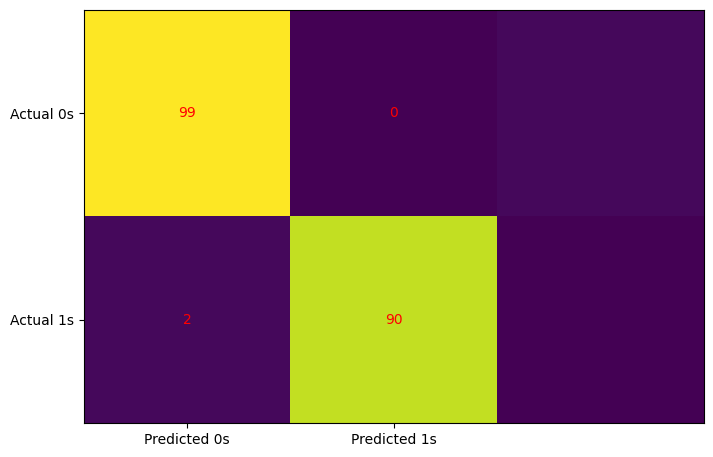

In [ ]:
m = confusion_matrix(y_train, pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(m)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, m[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       101
           1       0.99      0.98      0.98        92
           2       0.96      0.96      0.96        47

    accuracy                           0.97       240
   macro avg       0.97      0.97      0.97       240
weighted avg       0.98      0.97      0.98       240



In [ ]:
pre=model.predict(x_test)

In [ ]:
m=confusion_matrix(y_test,pre)
m


array([[51,  0,  0],
       [ 0, 32,  0],
       [ 0,  1, 20]])

In [ ]:
model.score(x_test,y_test)

0.9903846153846154

In [ ]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.97      1.00      0.98        32
           2       1.00      0.95      0.98        21

    accuracy                           0.99       104
   macro avg       0.99      0.98      0.99       104
weighted avg       0.99      0.99      0.99       104

